### This script allows to load OLR data, detect cloud bands and then do the inheritance tracking

In [1]:
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

from cloudbandpy.load_driver import run_load_data
from cloudbandpy.cb_detection import detection_workflow

from cloudbandpy.tracking import plot_tracking_on_map, tracking
from cloudbandpy.io_utilities import load_ymlfile, load_list, subset_latitudes, subset_longitudes
from cloudbandpy.time_utilities import create_list_of_dates, add_startend_datetime2config

Load configuration file and make adjustements for this test case

In [2]:
config_file = "../config/config_cbworkflow_southPacific.yml"
config = load_ymlfile(config_file, isconfigfile=True)
config_event = config.copy()
# Make sure that the period for the cloud bands cover the same period as the example data
config_event["startdate"] = "20210219.00"
config_event["enddate"] = "20210228.00"

config_event["clouddata_path"] = os.path.join("../data")
config_event["parameters_file"] = os.path.join("../parameters/parameters_southhemisphere.yml")

# No need to save any files
config_event["load_saved_files"] = False
config_event["save_dailyvar"] = False
config_event["save_listcloudbands"] = False

# filepath = f"{config['saved_dirpath']}list_of_cloud_bands"+config['startdate']+"-"+config['enddate']+"-"+config['domain']+".bin"
# print("Example data exists:", os.path.isfile(filepath))
# print("file is:", filepath)
print(config)

2023-11-21 15:10:30,174 - io_utilities.load_ymlfile - INFO: Configuration file loaded


{'run_inheritance_tracking': True, 'startdate': '20160101.00', 'enddate': '20160130.00', 'domain': 'southPacific', 'hemisphere': 'south', 'lon_west': 130, 'lon_east': 290, 'lat_north': 5, 'lat_south': -50, 'clouddata_path': './ERA5/netcdf/3hourly/surface_level/', 'varname_infilename': 'top_net_thermal_radiation', 'qd_var': True, 'datatimeresolution': 3.0, 'period_detection': 24.0, 'olr_convert2wm2': True, 'varname': 'ttr', 'timecoord_name': 'time', 'xcoord_name': 'longitude', 'ycoord_name': 'latitude', 'select_djfm': False, 'parameters_file': './cloudbandPy/parameters/parameters_southhemisphere.yml', 'saved_dirpath': './cloud_band_files', 'save_dailyvar': False, 'save_listcloudbands': True, 'load_saved_files': False, 'dir_figures': './cloud_band_figures', 'fig_detection_process': False, 'fig_time_evolution_object': False, 'fig_time_evolution_var_cloudband': False, 'fig_overlay_cloudband': False, 'fig_show_bbox_around_blobs': False, 'fig_inheritance_tracking': False, 'fig_density': Fals

Load cloud bands from the South Pacific for the dates specified in the analyses config file

In [3]:
add_startend_datetime2config(config_event)
listofdates = create_list_of_dates(config_event)
print(str(len(listofdates))+" dates created from "+str(listofdates[0])+" to "+str(listofdates[-1]))

10 dates created from 2021-02-19 00:00:00 to 2021-02-28 00:00:00


Load data

In [4]:
olr2process, parameters, listofdates, lats, lons, resolution = run_load_data(config_event)

2023-11-21 15:10:30,237 - load_driver.run_load_data - INFO: Loading data and parameters 
2023-11-21 15:10:30,240 - io_utilities.load_ymlfile - INFO: Parameters file loaded
2023-11-21 15:10:30,241 - io_utilities.load_dataset - INFO: Loading dataset from ../data
2023-11-21 15:10:30,241 - io_utilities.load_dataset - INFO: Loading 2021 --> 2021
2023-11-21 15:10:31,410 - io_utilities.get_variable_lonlat_from_domain - INFO: Subsetting dataset on domain done
2023-11-21 15:10:31,412 - io_utilities.make_daily_average - INFO: Computation of daily average
2023-11-21 15:10:31,682 - io_utilities.make_daily_average - INFO: Computation of daily average done
2023-11-21 15:10:31,684 - io_utilities.load_dataset - INFO: Dataset loaded


Run detection

In [5]:
(
        _,
        _,
        _,
        _,
        cloud_bands_over_time,
        list_of_cloud_bands,
    ) = detection_workflow(
        var2process=olr2process,
        parameters=parameters,
        latitudes=lats,
        longitudes=lons,
        resolution=resolution,
        listofdates=listofdates,
        config=config,
    )

2023-11-21 15:10:31,719 - cb_detection.detection_workflow - INFO: Cloud band detection in progress
2023-11-21 15:10:31,842 - cb_detection.detection_workflow - INFO: Cloud band detection done


Get life cycle of each cloud band

In [6]:
print(parameters["othresh"])

0.1


In [7]:
list_of_cloud_bands = tracking(list_of_cloud_bands, resolution, overlapfactor=parameters["othresh"])

2023-11-21 15:10:31,856 - cloudbandpy.tracking - INFO: Inheritance tracking in progress
2023-11-21 15:10:31,861 - cloudbandpy.tracking - INFO: Inheritance tracking done


5039827.562665362 8429292.43076536
5039827.562665362 6140152.9956693705
0.0 4328414.1198456995
0.0 6140152.9956693705
0.0 8429292.43076536
0.0 4274535.569489489
2768262.6057560877 4328414.1198456995
2768262.6057560877 4274535.569489489
2492714.7263442352 6140152.9956693705
2492714.7263442352 14628136.78799195
3200497.1075026346 4274535.569489489
3200497.1075026346 14628136.78799195
10615014.675732115 14628136.78799195
10615014.675732115 14828158.198069736
9448662.44695151 14828158.198069736
9448662.44695151 11578344.03624285
1497390.027861526 14828158.198069736
1497390.027861526 2191571.9123472963
8962567.240846317 11578344.03624285
8962567.240846317 11003827.974191451
5761.755230283159 2191571.9123472963
5761.755230283159 11003827.974191451
0.0 11578344.03624285
0.0 3182128.975536645
1279967.1642018056 2191571.9123472963
1279967.1642018056 3182128.975536645
9098702.046789614 11003827.974191451
9098702.046789614 15663633.755650155
1608126.9177249107 3182128.975536645
1608126.9177249107

Import longitudes and latitudes for the map

In [8]:
lons_globe = np.arange(0,360,.5)
lats_globe = np.arange(90,-90.5,-.5)
print(lats_globe.all()==lats_globe.all())
# Get longitudes and latitudes of South Pacific domain
_, lonsSP = subset_longitudes(lons_globe, config["lon_west"], config["lon_east"])
_, latsSP = subset_latitudes(lats_globe, config["lat_north"], config["lat_south"])

print(f"Longitudes, min: {lonsSP.min()}, max: {lonsSP.max()}")
print(f"Latitudes, min: {latsSP.min()}, max: {latsSP.max()}")

True
Longitudes, min: 130.0, max: 290.0
Latitudes, min: -50.0, max: 5.0


Create the series of map with connection lines between the centroid lcoation of each cloud bands

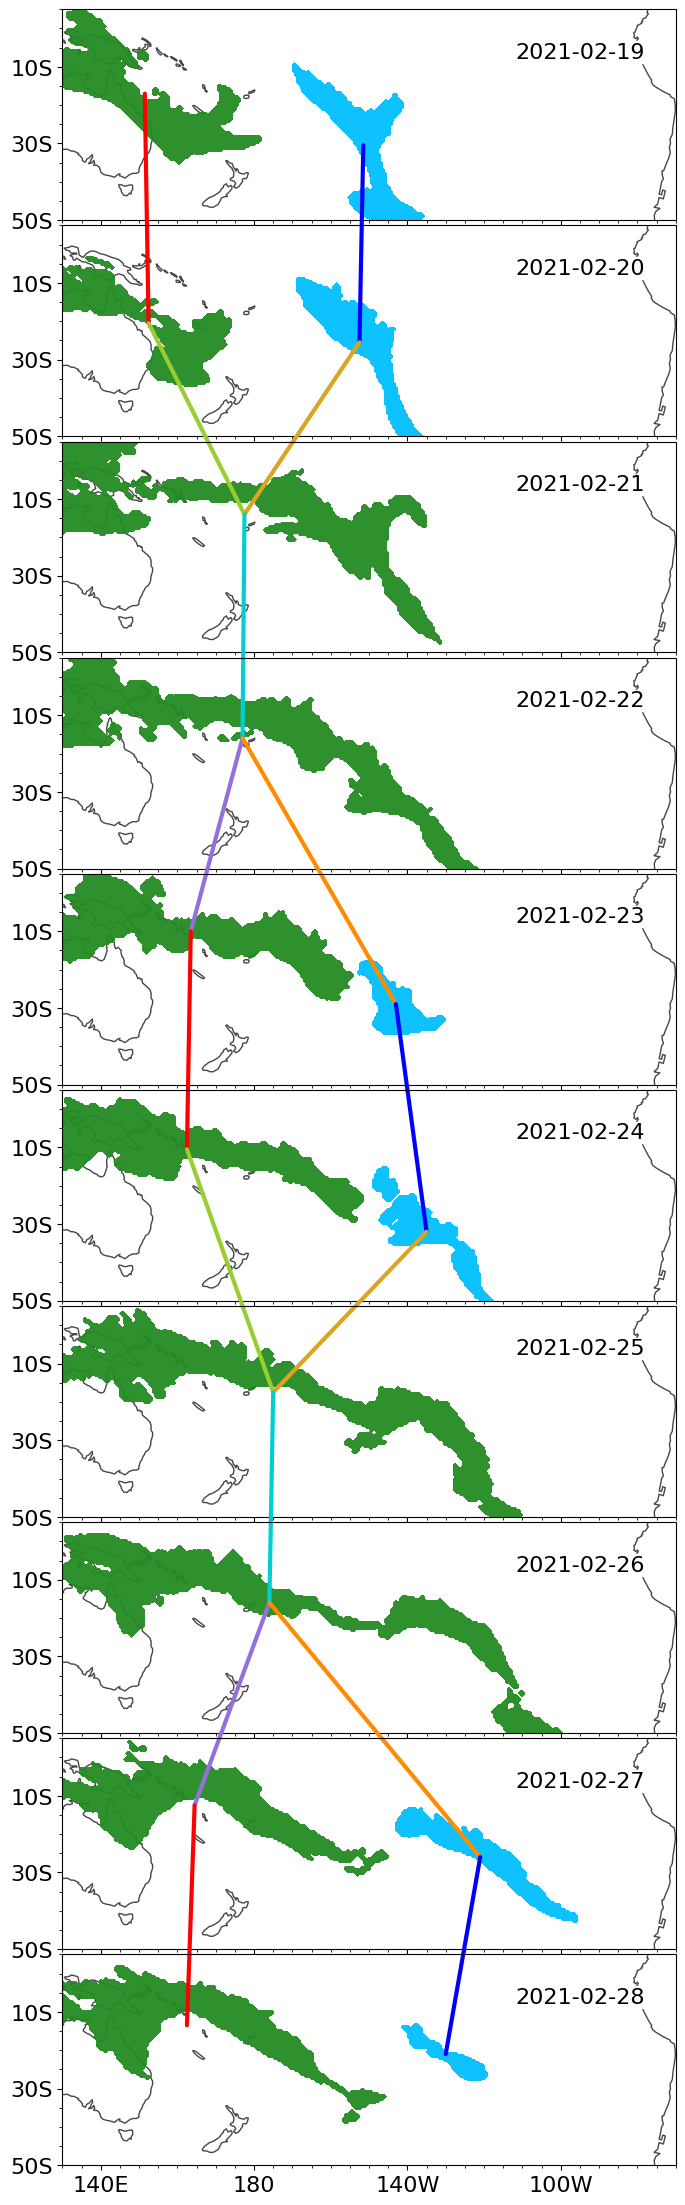

In [9]:
plot_tracking_on_map(
    list_of_cloud_bands=list_of_cloud_bands,
    lons=lonsSP,
    lats=latsSP,
    listofdates=listofdates,
    config=config,
    show=True,
    save=False,
)